# Brain Stroke Prediction

## Install the libraries

In [152]:
!pip install matplotlib
!pip install pandas
!pip install seaborn
!pip install sklearn

You should consider upgrading via the 'c:\users\sheng\pycharmprojects\brain stroke prediction\venv\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\sheng\pycharmprojects\brain stroke prediction\venv\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\sheng\pycharmprojects\brain stroke prediction\venv\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\sheng\pycharmprojects\brain stroke prediction\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [153]:
# import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)

## Prepare the dataset

In [154]:
data = pd.read_csv(r'C:\Users\sheng\PycharmProjects\Brain Stroke Prediction\healthcare-dataset-stroke-data.csv')

In [155]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Exploratory data analysis

In [156]:
# to display the data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [157]:
# to identify the null data, bmi
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Fill the Null Values in BMI

In [158]:
data['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [159]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [160]:
data['bmi'].fillna(data['bmi'].mean(), inplace=True) # fill with mean so the data dont change much

In [161]:
data['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [162]:
data.isnull().sum() # we have 0 null values in the dataset now

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Feature Selection (select the variables we need)

In [163]:
data.drop('id', axis=1, inplace=True) # remove the id column

In [164]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


## Outlier Removation

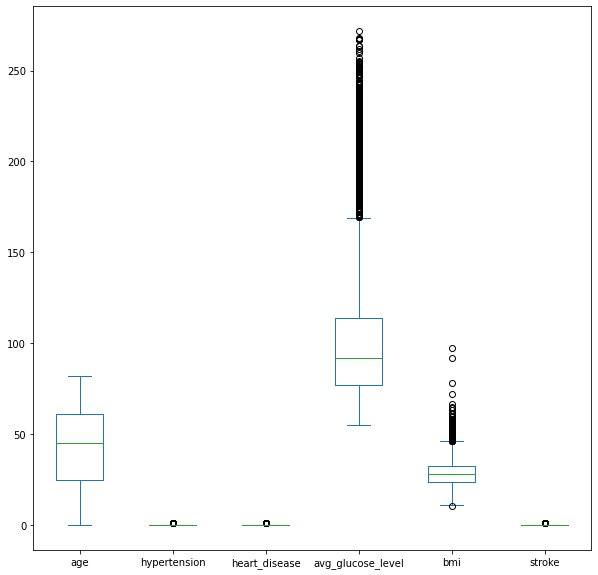

In [165]:
data.plot(kind = 'box')      # Boxplot to identify the outliers
plt.show()

# Label Encoding

In [166]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [167]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [168]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [169]:
gender = enc.fit_transform(data['gender'])
smoking_status = enc.fit_transform(data['smoking_status'])
work_type = enc.fit_transform(data['work_type'])
Residence_type = enc.fit_transform(data['Residence_type'])
ever_married = enc.fit_transform(data['ever_married'])

In [170]:
data['work_type'] = work_type # label the data 
data['ever_married'] = ever_married
data['Residence_type'] = Residence_type
data['smoking_status'] = smoking_status
data['gender'] = gender

In [171]:
data # the encoder to make every data into numbers

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


## Splitting the data for train and test

#### X : train_X, test_X  ratio of 80/20
#### Y : train_Y, test_Y

In [172]:
X = data.drop('stroke', axis=1)

In [173]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


In [174]:
Y = data['stroke']

In [175]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [177]:
X_train # the questions

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3831,0,55.0,0,0,0,3,0,67.10,31.400000,2
5085,0,72.0,0,0,1,2,1,83.89,33.100000,1
1593,1,31.0,0,0,1,2,1,71.31,25.800000,2
1324,0,80.0,0,0,1,0,1,84.86,28.893237,0
123,1,56.0,1,0,1,2,0,249.31,35.800000,2
...,...,...,...,...,...,...,...,...,...,...
4171,1,45.0,0,0,1,2,1,115.52,33.900000,1
599,0,59.0,1,0,1,2,1,204.86,30.800000,2
1361,0,59.0,0,0,1,2,1,89.96,28.100000,0
1547,1,59.0,0,1,1,3,0,194.98,30.400000,0


In [178]:
X_test  # new questions

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5031,0,20.0,0,0,0,2,0,117.59,17.1,2
4017,0,44.0,0,0,1,2,0,110.41,30.5,3
744,0,71.0,1,0,1,2,1,194.62,31.6,2
1799,1,34.0,0,0,1,2,1,108.12,22.2,0
2314,1,82.0,0,0,1,2,1,89.83,24.7,3
...,...,...,...,...,...,...,...,...,...,...
4795,1,62.0,0,0,1,3,0,136.18,32.2,0
4641,0,45.0,0,0,1,0,0,84.99,35.4,0
1320,0,58.0,0,1,1,2,0,144.16,26.0,3
1098,0,77.0,0,0,1,2,0,75.06,22.0,0


In [179]:
Y_train # the answer

3831    0
5085    0
1593    0
1324    0
123     1
       ..
4171    0
599     0
1361    0
1547    0
4959    0
Name: stroke, Length: 4088, dtype: int64

In [180]:
Y_test  # the correct answer for new questions

5031    0
4017    0
744     0
1799    0
2314    0
       ..
4795    0
4641    0
1320    0
1098    0
4634    0
Name: stroke, Length: 1022, dtype: int64

## Normalize the data

In [181]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [182]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler() # scale the data into a range that is smaller 

In [183]:
X_train_std = std.fit_transform(X_train) # understand the data and transform it
X_test_std = std.transform(X_test) # the model should not understand the data. Instead just transform it

# Save the scaler object

In [211]:
import pickle 
import os
#root = os.chdir(r'C:\Users\sheng\PycharmProjects\Brain Stroke Prediction/')

In [223]:
scaler_path = os.path.join('C:/Users/sheng/PycharmProjects/Brain Stroke Prediction/', 'models/scaler.pkl')
with open(scaler_path, 'wb') as scaler_file:
    pickle.dump(std, scaler_file)

In [184]:
X_train_std

array([[-0.83822764,  0.52508975, -0.32887595, ..., -0.86380214,
         0.32750249,  0.58675012],
       [-0.83822764,  1.27625065, -0.32887595, ..., -0.49693827,
         0.5478543 , -0.34367443],
       [ 1.19059095, -0.53537271, -0.32887595, ..., -0.77181304,
        -0.39836227,  0.58675012],
       ...,
       [-0.83822764,  0.70183349, -0.32887595, ..., -0.36430791,
        -0.10023924, -1.27409897],
       [ 1.19059095,  0.70183349, -0.32887595, ...,  1.93039389,
         0.19788379, -1.27409897],
       [-0.83822764,  0.30416007, -0.32887595, ..., -0.96147227,
        -0.70944717,  0.58675012]])

In [185]:
X_test_std

array([[-0.83822764, -1.021418  , -0.32887595, ...,  0.23941148,
        -1.52604504,  0.58675012],
       [-0.83822764,  0.03904446, -0.32887595, ...,  0.08252747,
         0.21084566,  1.51717466],
       [-0.83822764,  1.23206472,  3.04066013, ...,  1.92252784,
         0.35342624,  0.58675012],
       ...,
       [-0.83822764,  0.65764755, -0.32887595, ...,  0.81996973,
        -0.37243853,  1.51717466],
       [-0.83822764,  1.49718033, -0.32887595, ..., -0.68987501,
        -0.89091336, -1.27409897],
       [ 1.19059095,  1.49718033, -0.32887595, ..., -0.26117525,
         0.61266365, -1.27409897]])

## Training

## Decision Tree 

In [214]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [215]:
dt.fit(X_train_std, Y_train)

DecisionTreeClassifier()

In [216]:
dt.feature_importances_ # the weightage of the features

array([0.02977328, 0.17705156, 0.0231195 , 0.02113875, 0.01355344,
       0.03235291, 0.04768639, 0.33387615, 0.24789494, 0.07355309])

In [217]:
X_train.columns # the important features in the Decision Tree

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [218]:
Y_test

5031    0
4017    0
744     0
1799    0
2314    0
       ..
4795    0
4641    0
1320    0
1098    0
4634    0
Name: stroke, Length: 1022, dtype: int64

In [219]:
Y_pred_dt = dt.predict(X_test_std)

In [220]:
from sklearn.metrics import accuracy_score

In [221]:
ac_dt = accuracy_score(Y_test, Y_pred_dt) # check the accuracy of decision tree
ac_dt

0.9031311154598826

In [222]:
# save the decision tree
import joblib
model_path = os.path.join('C:/Users/sheng/PycharmProjects/Brain Stroke Prediction/', 'models/dt.sav')
joblib.dump(dt, model_path)

['C:/Users/sheng/PycharmProjects/Brain Stroke Prediction/models/dt.sav']

## Logistic Regression

In [194]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [195]:
lr.fit(X_train_std, Y_train)

LogisticRegression()

In [196]:
Y_pred_lr = lr.predict(X_test_std)

In [197]:
ac_lr = accuracy_score(Y_test, Y_pred_lr)
ac_lr

0.9471624266144814

## KNN

In [198]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [199]:
knn.fit(X_train_std, Y_train)

KNeighborsClassifier()

In [200]:
Y_pred_knn = knn.predict(X_test_std)

In [201]:
ac_knn = accuracy_score(Y_test, Y_pred_knn)
ac_knn

0.9452054794520548

## Random Forest (more decision tree than DT)

In [202]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [203]:
rf.fit(X_train_std, Y_train)

RandomForestClassifier()

In [204]:
Y_pred_rf = rf.predict(X_test_std)

In [205]:
ac_rf = accuracy_score(Y_test, Y_pred_rf)
ac_rf

0.9461839530332681

## SVM (Support Vector Machine)

In [206]:
from sklearn.svm import SVC # Support Vector Classifier
svc = SVC()

In [207]:
svc.fit(X_train_std, Y_train)

SVC()

In [208]:
Y_pred_svc = svc.predict(X_test_std)

In [209]:
ac_svc = accuracy_score(Y_test, Y_pred_svc)
ac_svc

0.9471624266144814

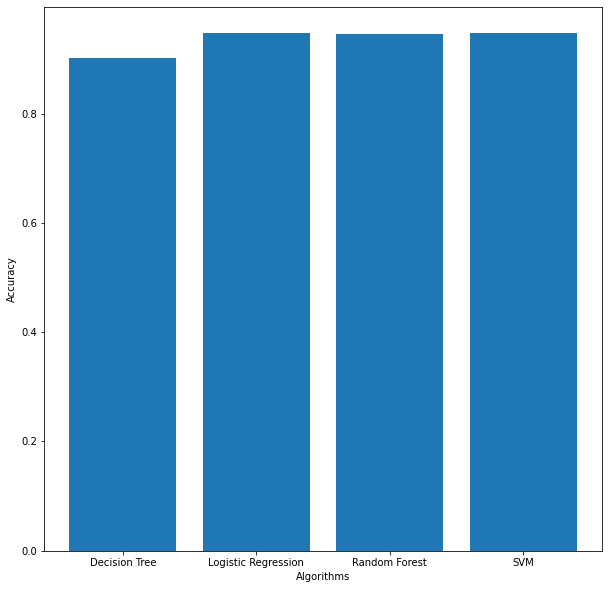

In [210]:
# plot the accuracy scores
plt.bar(['Decision Tree', 'Logistic Regression', 'Random Forest', 'SVM'],[ac_dt, ac_lr, ac_rf, ac_svc])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()